# Ungraded Lab: First Autoencoder

In this lab, you will build your first simple autoencoder. This will take in three-dimensional data, encodes it to two dimensions, and decodes it back to 3D.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare Synthetic Dataset

In [2]:
def generate_data(m):
    '''
    Plots m random points on a 3D plane
    '''
    
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

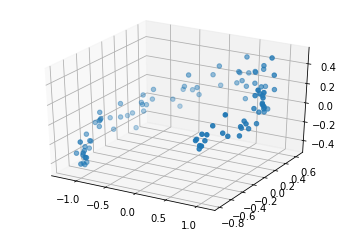

In [3]:
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# Preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds')

## Build the Model
Now you will build the simple encoder-decoder model. Notice the number of neurons in each Dense layer. The model will contract in the encoder then expand in the decoder

In [4]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

In [5]:
autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.1))

## Train the Model

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200, verbose=0)

## Plot the Encoder Output

In [7]:
# Encode the data
codings = encoder.predict(X_train)

# See a sample input-encoder output pair
print(f'Input point: {X_train[0]}')
print(f'Encoded point: {codings[0]}')

Input point: [-1.16222108 -0.61215923 -0.45789907]
Encoded point: [ 1.6284398 -1.4301585]


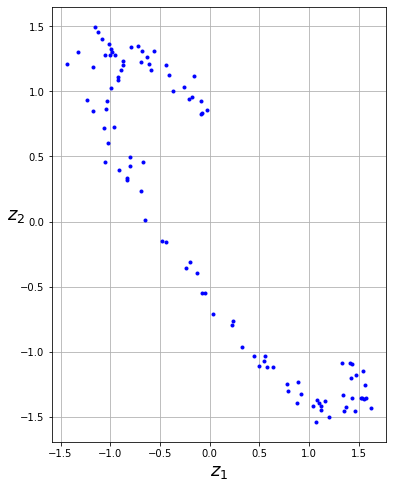

In [8]:
fig = plt.figure(figsize=(6, 8))
plt.plot(codings[:, 0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder Output

In [10]:
# encode the data
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')


input point: [-1.16222108 -0.61215923 -0.45789907]
encoded point: [ 1.6284398 -1.4301585]
decoded point: [-1.2401766  -0.7046758  -0.36657375]


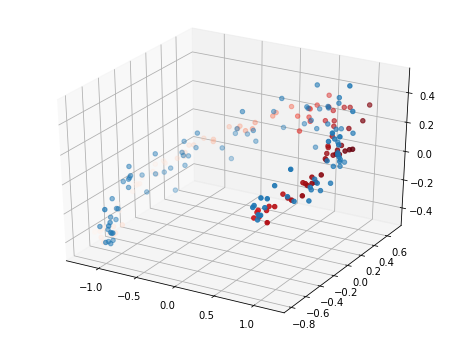

In [12]:
# plot the decoder output
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Blues');
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');